In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
df = pd.read_csv('/content/sample_data/amazon_alexa.tsv',sep='\t')

In [56]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


<Axes: xlabel='rating', ylabel='count'>

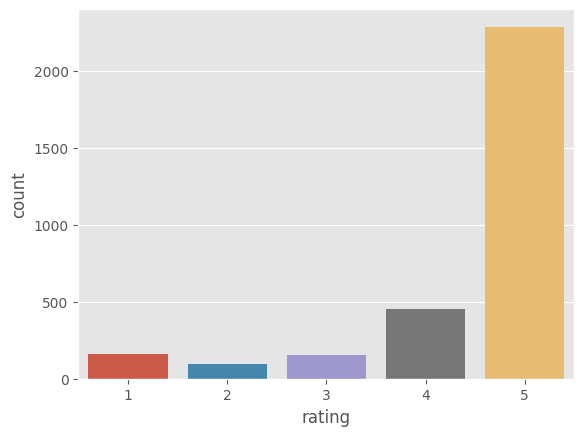

In [58]:
sns.countplot(x='rating', data=df)

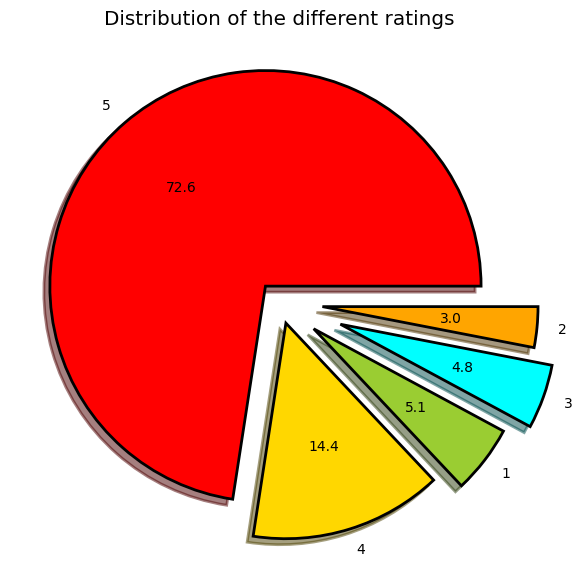

In [59]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold","yellowgreen","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

<Axes: xlabel='variation', ylabel='count'>

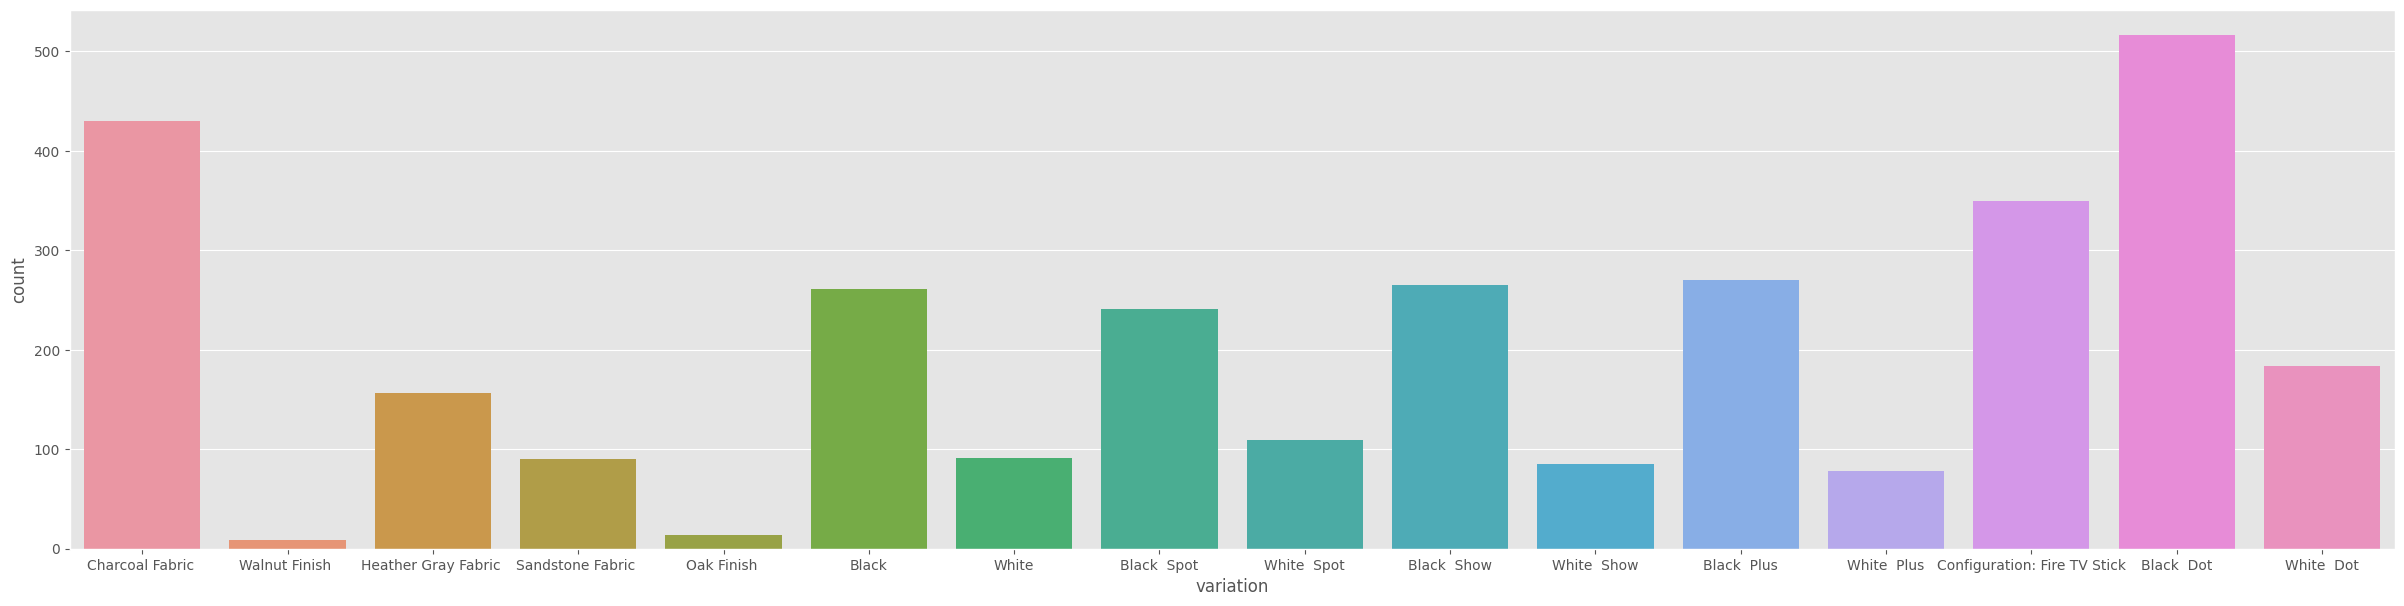

In [60]:
fig = plt.figure(figsize=(30,7))
sns.countplot(x="variation",data=df)

<Axes: xlabel='count', ylabel='variation'>

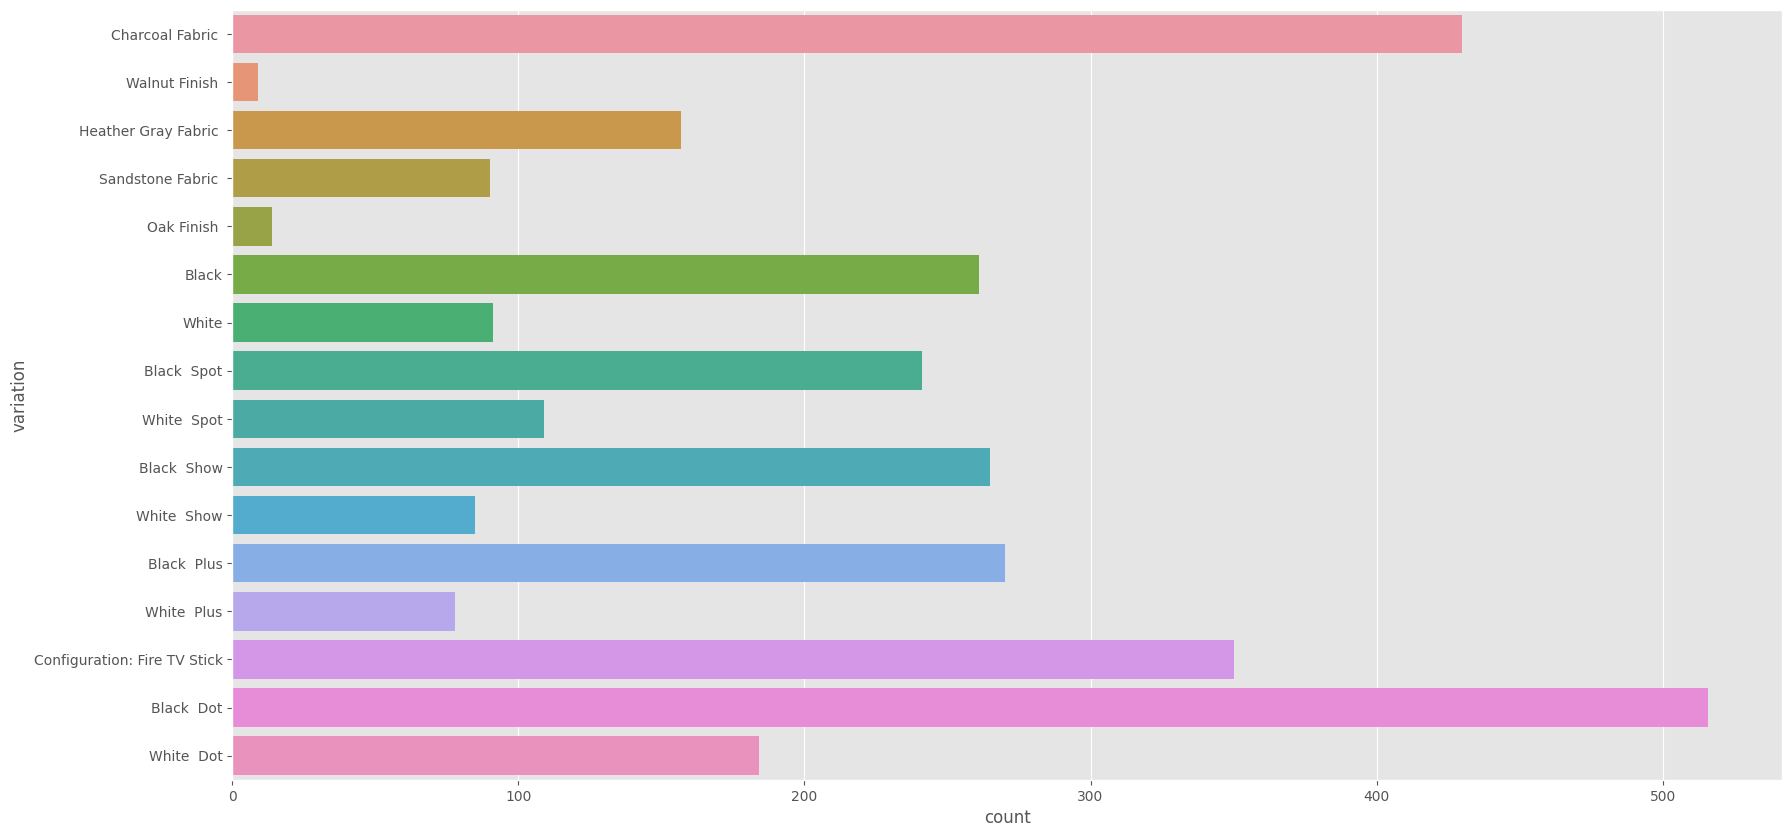

In [61]:
ig = plt.figure(figsize=(20,10))
sns.countplot(y="variation",data=df)

In [62]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

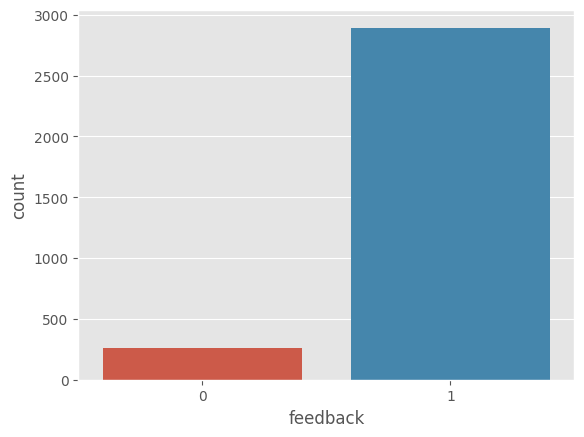

In [63]:
sns.countplot(x='feedback', data=df)
plt.show()

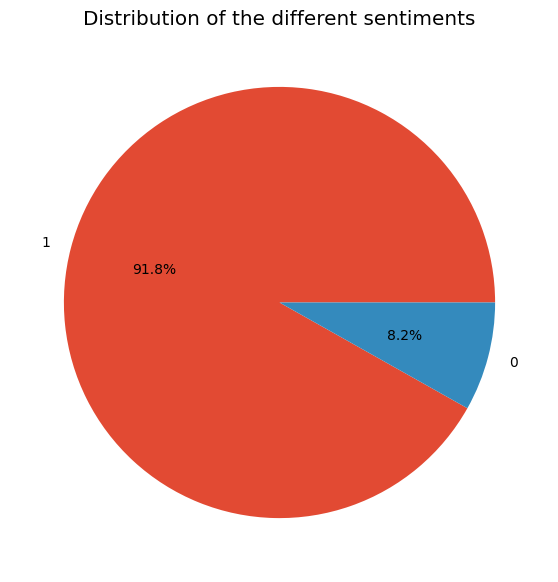

In [64]:
fig = plt.figure(figsize=(7,7))
tags = df['feedback'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [65]:
for i in range(5):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 



In [66]:
def data_processing(text):
  filtered_text =[] 
  for item in text:
      text = text.lower()
      text = re.sub(r"http\S+www\S+|https\S+", '', text, flags= re.MULTILINE)
      text = re.sub(r'[^\w\s]','',text)
      text_tokens = word_tokenize(text)
      filtered_text= [w for w in text_tokens if not w in set(stopwords.words('english'))]
  return " ".join(filtered_text)

In [67]:
df['verified_reviews'] = df['verified_reviews'].str.lower()

In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
df['verified_reviews'] = df['verified_reviews'].apply(lambda x: ' '.join([ps.stem(word) for word in nltk.word_tokenize(re.sub('[^a-zA-Z0-9]', ' ', x)) if word not in stop_words]))

In [71]:
pos_reviews = df[df.feedback == 1]
pos_reviews.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,love,1
2,4,31-Jul-18,Walnut Finish,sometim play game answer question correctli al...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learn dinosaur control ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


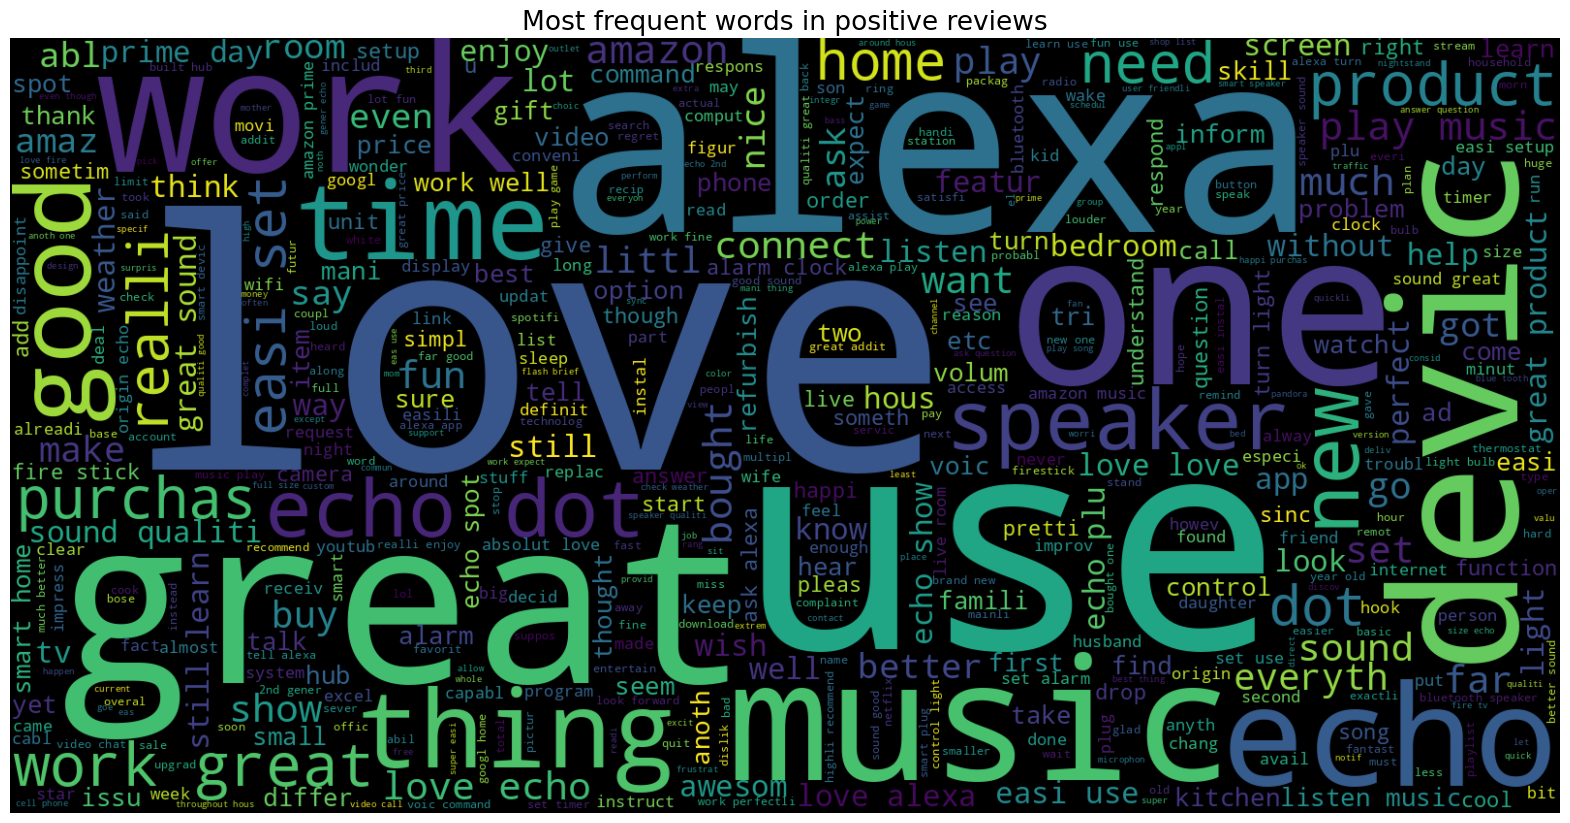

In [72]:
text = ' '.join([word for word in pos_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [73]:
neg_reviews = df[df.feedback==0]
neg_reviews.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,like siri fact siri answer accur alexa see rea...,0
111,2,30-Jul-18,Charcoal Fabric,sound terribl u want good music get bose,0
141,1,30-Jul-18,Charcoal Fabric,much featur,0
162,1,30-Jul-18,Sandstone Fabric,stop work 2 week follow command realli fun work,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0


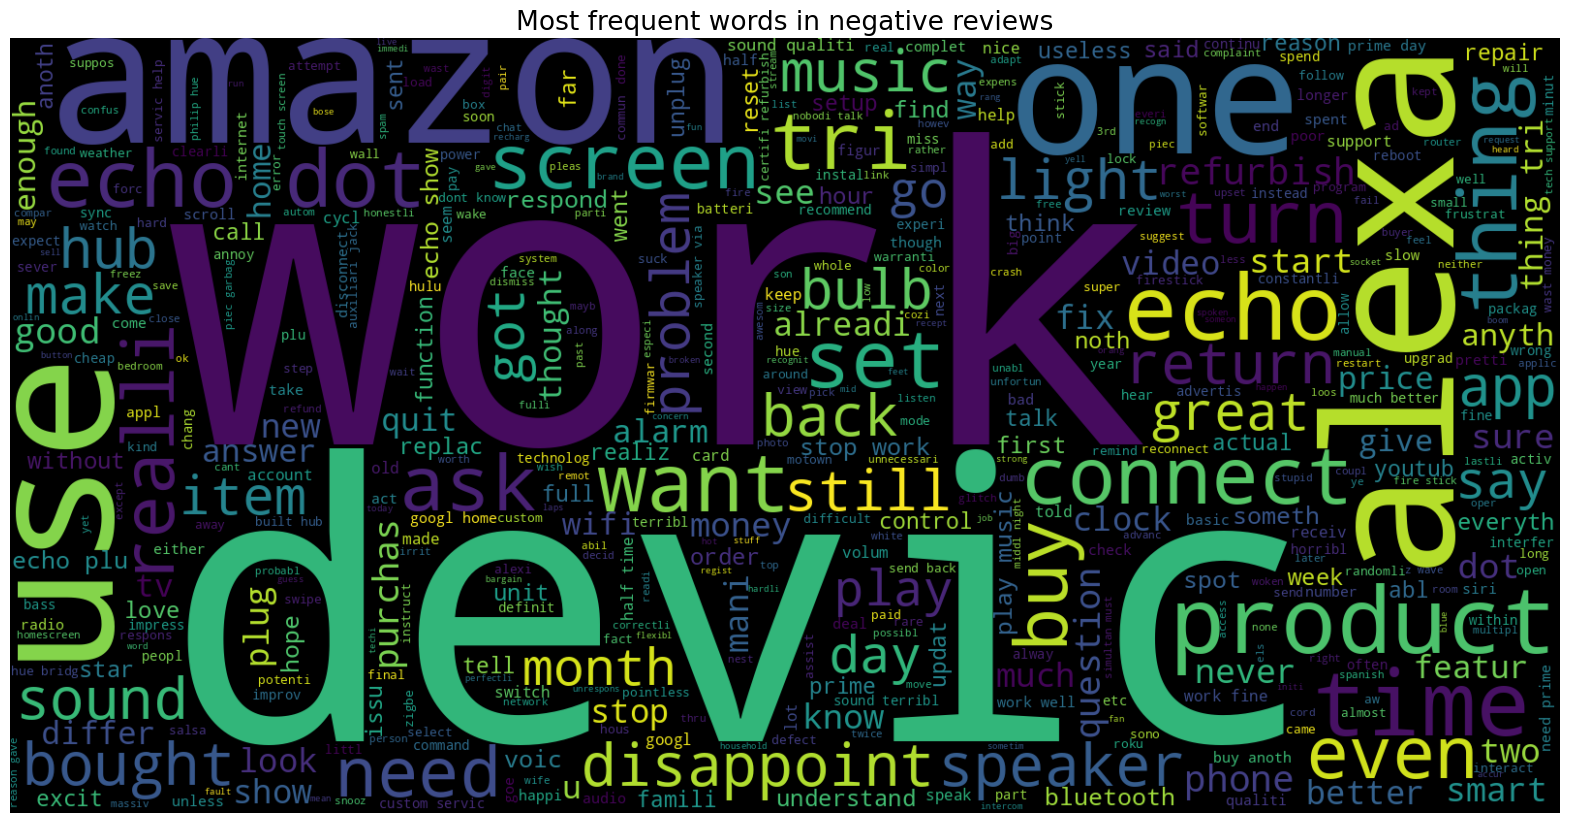

In [74]:
text = ' '.join([word for word in neg_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [75]:
X = df['verified_reviews']
Y = df['feedback']

In [76]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(df['verified_reviews']).toarray()

In [77]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [78]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the VADER sentiment lexicon
sid = SentimentIntensityAnalyzer()

# Apply the sentiment lexicon to the preprocessed reviews to get the polarity scores
df['polarity_scores'] = df['verified_reviews'].apply(lambda x: sid.polarity_scores(x))

# Assign the sentiment label (positive, negative, or neutral) based on the polarity scores
df['sentiment_label'] = df['polarity_scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))


In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [80]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_label'], test_size=0.2, random_state=42)


In [81]:
# Train the SVM model on the training set
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


SVC(kernel='linear')

In [82]:
# Test the SVM model on the testing set and evaluate its performance
y_pred = svc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.953968253968254
Precision: 0.953134308713302
Recall: 0.953968253968254
F1 Score: 0.9533412755409534


In [83]:
# Fine-tune the SVM model using GridSearchCV to improve its performance
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)
y_pred = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.931 total time=   2.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.893 total time=   1.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   2.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.911 total time=   2.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.905 total time=   2.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   3.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   3.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time=   3.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time=   4.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   3.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.770 total time=   4.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly